In [2]:
import os

In [3]:
original_dataset_dir = '/home/maxwu/jpgs_inverted'

In [4]:
train_dir = original_dataset_dir + '/train'
val_dir = original_dataset_dir + '/val'
test_dir = original_dataset_dir + '/test'

trn_NON_dir = original_dataset_dir + '/train/none'
trn_AFF_dir = original_dataset_dir + '/train/AFF'
trn_MIN_dir = original_dataset_dir + '/train/MIN'
trn_MAJ_dir = original_dataset_dir + '/train/MAJ'
trn_DES_dir = original_dataset_dir + '/train/DES'

val_NON_dir = original_dataset_dir + '/val/none'
val_AFF_dir = original_dataset_dir + '/val/AFF'
val_MIN_dir = original_dataset_dir + '/val/MIN'
val_MAJ_dir = original_dataset_dir + '/val/MAJ'
val_DES_dir = original_dataset_dir + '/val/DES'

tst_NON_dir = original_dataset_dir + '/test/none'
tst_AFF_dir = original_dataset_dir + '/test/AFF'
tst_MIN_dir = original_dataset_dir + '/test/MIN'
tst_MAJ_dir = original_dataset_dir + '/test/MAJ'
tst_DES_dir = original_dataset_dir + '/test/DES'

In [5]:
print('Number of Images')
print()

print('Train:')
print('NON:', len(os.listdir(trn_NON_dir)))
print('AFF:', len(os.listdir(trn_AFF_dir)))
print('MIN:', len(os.listdir(trn_MIN_dir)))
print('MAJ:', len(os.listdir(trn_MAJ_dir)))
print('DES:', len(os.listdir(trn_DES_dir)))
print()

print('Validation:')
print('NON:', len(os.listdir(val_NON_dir)))
print('AFF:', len(os.listdir(val_AFF_dir)))
print('MIN:', len(os.listdir(val_MIN_dir)))
print('MAJ:', len(os.listdir(val_MAJ_dir)))
print('DES:', len(os.listdir(val_DES_dir)))
print()

print('Test:')
print('NON:', len(os.listdir(tst_NON_dir)))
print('AFF:', len(os.listdir(tst_AFF_dir)))
print('MIN:', len(os.listdir(tst_MIN_dir)))
print('MAJ:', len(os.listdir(tst_MAJ_dir)))
print('DES:', len(os.listdir(tst_DES_dir)))

Number of Images

Train:
NON: 6312
AFF: 926
MIN: 543
MAJ: 184
DES: 469

Validation:
NON: 2103
AFF: 308
MIN: 180
MAJ: 65
DES: 157

Test:
NON: 2106
AFF: 313
MIN: 184
MAJ: 60
DES: 154


In [23]:
from keras import layers
from keras import models
from keras.layers import LeakyReLU
from keras.regularizers import l2

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), input_shape = (128,128,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model.add(layers.Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model.add(layers.Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model.add(layers.Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,W_regularizer = l2(3e-5)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation = 'sigmoid'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_regularizer=<keras.reg...)`


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)       73856     
__________

In [25]:
#compile the model with RMSprob with learning rate
from keras import optimizers

# model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(), metrics = ['acc'])
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.Adam(), metrics = ['acc'])

In [26]:
#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#normalize the image pixel value to be between 0 and 1
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented

print("Training Set:")
train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (128,128),
                    batch_size = 25,
                    class_mode = 'categorical')

print("Validation Set:")
validation_generator = val_datagen.flow_from_directory(
                    val_dir,
                    target_size = (128,128),
                    batch_size = 25,
                    class_mode = 'categorical')

Training Set:
Found 8434 images belonging to 5 classes.
Validation Set:
Found 2813 images belonging to 5 classes.


In [27]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/50
100/100 [==============================] - 12s 123ms/step - loss: 0.9937 - acc: 0.7412 - val_loss: 0.9126 - val_acc: 0.7568
Epoch 2/50
100/100 [==============================] - 11s 114ms/step - loss: 0.9223 - acc: 0.7464 - val_loss: 0.9109 - val_acc: 0.7480
Epoch 3/50
100/100 [==============================] - 11s 114ms/step - loss: 0.9042 - acc: 0.7552 - val_loss: 0.9417 - val_acc: 0.7342
Epoch 4/50
100/100 [==============================] - 11s 115ms/step - loss: 0.9218 - acc: 0.7448 - val_loss: 0.8785 - val_acc: 0.7552
Epoch 5/50
100/100 [==============================] - 11s 114ms/step - loss: 0.9063 - acc: 0.7504 - val_loss: 1.0788 - val_acc: 0.7407
Epoch 6/50
100/100 [==============================] - 11s 115ms/step - loss: 0.9298 - acc: 0.7428 - val_loss: 0.9341 - val_acc: 0.7384
Epoch 7/50
100/100 [==============================] - 11s 113ms/step - loss: 0.9061 - acc: 0.7558 - val_loss: 0.9042 - val_acc: 0.7488
Epoch 8/50
100/100 [==============================] - 1

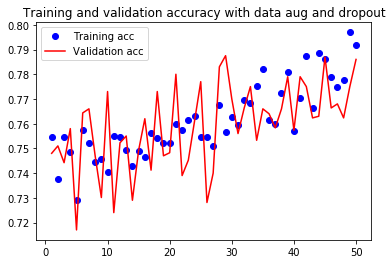

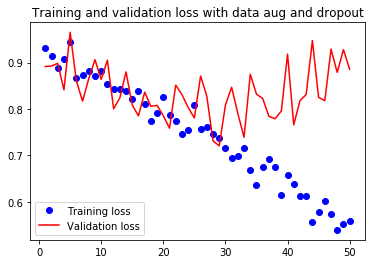

In [19]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout')
plt.legend()

plt.show()
plt.show()